# Logistic Regression Classifier

We will Try to use a Logistic Regression in Predicting whether a user will Purchase an Expensive SUV car or not purchase it.

The Dataset consists of 400 observations classified under Gender, Age, Salary.


In [39]:
#Importing the dataset
dataset = read.csv('Social_Network_Ads.csv')
head(dataset)

User.ID,Gender,Age,EstimatedSalary,Purchased
15624510,Male,19,19000,0
15810944,Male,35,20000,0
15668575,Female,26,43000,0
15603246,Female,27,57000,0
15804002,Male,19,76000,0
15728773,Male,27,58000,0


In [40]:
summary(dataset)

    User.ID            Gender         Age        EstimatedSalary 
 Min.   :15566689   Female:204   Min.   :18.00   Min.   : 15000  
 1st Qu.:15626764   Male  :196   1st Qu.:29.75   1st Qu.: 43000  
 Median :15694342                Median :37.00   Median : 70000  
 Mean   :15691540                Mean   :37.66   Mean   : 69742  
 3rd Qu.:15750363                3rd Qu.:46.00   3rd Qu.: 88000  
 Max.   :15815236                Max.   :60.00   Max.   :150000  
   Purchased     
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.3575  
 3rd Qu.:1.0000  
 Max.   :1.0000  

In [10]:
dataset = dataset[3:5]
head(dataset)

Age,EstimatedSalary,Purchased
19,19000,0
35,20000,0
26,43000,0
27,57000,0
19,76000,0
27,58000,0


In [11]:
# Encoding the target feature as factor
dataset$Purchased = factor(dataset$Purchased, levels = c(0, 1))

In [13]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set = subset(dataset, split == TRUE)
test_set = subset(dataset, split == FALSE)

In [19]:
# Feature Scaling
training_set[1:2] = scale(training_set[1:2])
test_set[1:2] = scale(test_set[1:2])

In [20]:
head(training_set)

,Age,EstimatedSalary,Purchased
1,-1.7655475,-1.4733414,0
3,-1.0962966,-0.7883761,0
6,-1.0006894,-0.3602727,0
7,-1.0006894,0.3817730,0
8,-0.5226531,2.2654277,1
10,-0.2358313,-0.1604912,0


In [21]:
head(test_set)

,Age,EstimatedSalary,Purchased
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


In [22]:
# Fitting Logistic Regression to the Training set
classifier = glm(formula = Purchased ~ ., family = binomial, data = training_set)

In [23]:
# Predicting the Test set results
prob_pred = predict(classifier, type = 'response', newdata = test_set[-3])

In [27]:
head(prob_pred)
# Note we get only the probability whether an individual will purchase or Not.

2           4           5           9          12          18 
0.016239538 0.011714838 0.003784646 0.002452746 0.007333944 0.206157658

In [25]:
y_pred = ifelse(prob_pred > 0.5, 1, 0)

In [28]:
tail(y_pred)
# Now we have a 0 or 1 as the user will not puchase or make a purchase.

380 383 389 392 395 400 
  1   1   0   0   0   1

In [29]:
# Making the Confusion Matrix
cm = table(test_set[, 3], y_pred > 0.5)

In [30]:
cm 
# Note the 57 and 26 are correct Predictions. The 10 and 7 are INCORRECT predictions.

   
    FALSE TRUE
  0    57    7
  1    10   26

In [34]:
#install.packages('ElemStatLearn')
library(ElemStatLearn)

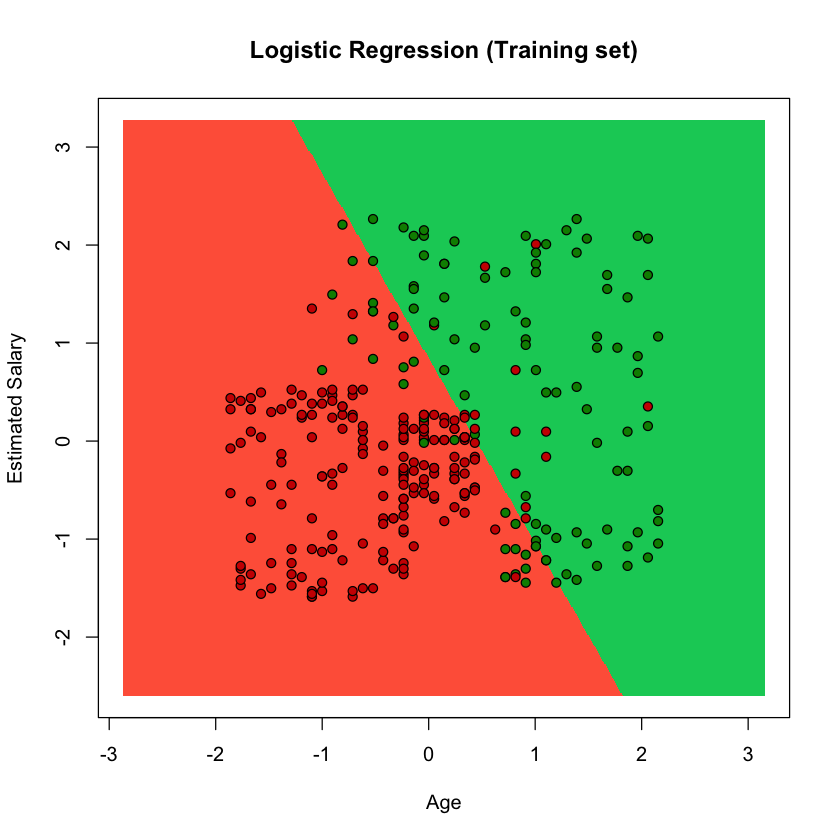

In [36]:
set = training_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Training set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

### The ultimate objective is to classify the users into the right category.
**The Dots represents the users classified under the Age and salary.**
 - The red points represents the Users not making the Purchase
 - The Green dots represents the users making the Purchase.
 - The users who are young did not make the purchase but the users above Age 1 or 2 made the purchase.
 - We note the straight line seperating two users because, its a linear classifier model of logistic regression.
 

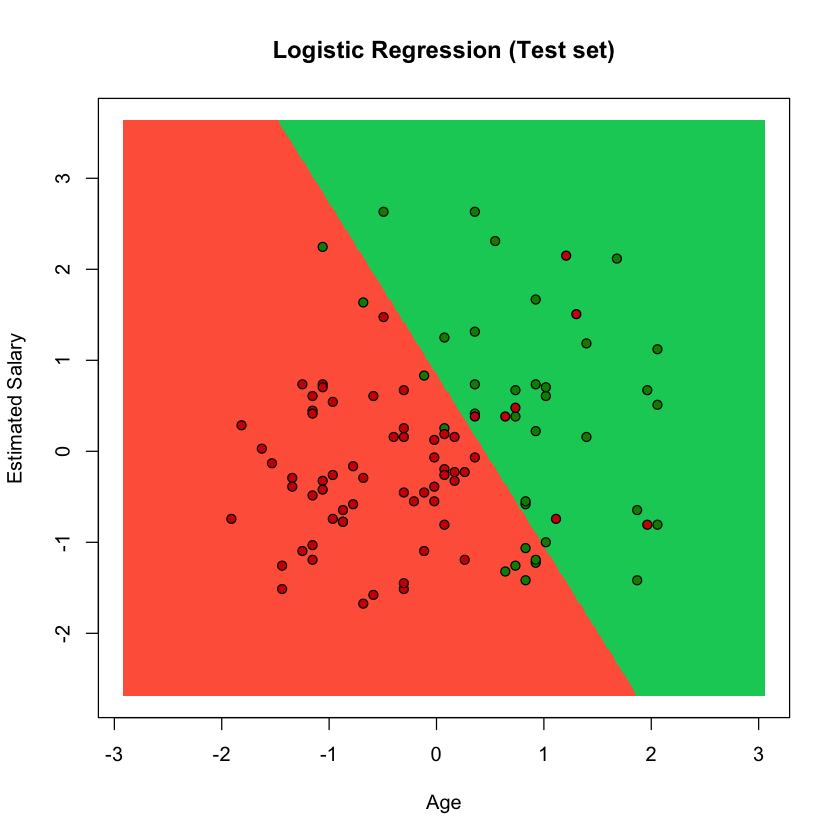

In [37]:
# Visualising the Test set results
library(ElemStatLearn)
set = test_set
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
prob_set = predict(classifier, type = 'response', newdata = grid_set)
y_grid = ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
     main = 'Logistic Regression (Test set)',
     xlab = 'Age', ylab = 'Estimated Salary',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))

 - We see the Incorrest Predictions clearly from the test set graph.